### Team member: Felix Vu, Prachitee Chouhan, Jay Singfhvi

### Clustering: K Means

#### A. Inertia evaluation method

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm


In [2]:
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Sulfate','Turbidity']

In [4]:
# Normalizing data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), index = data.index, columns = data.columns)

Text(0, 0.5, 'Inertia')

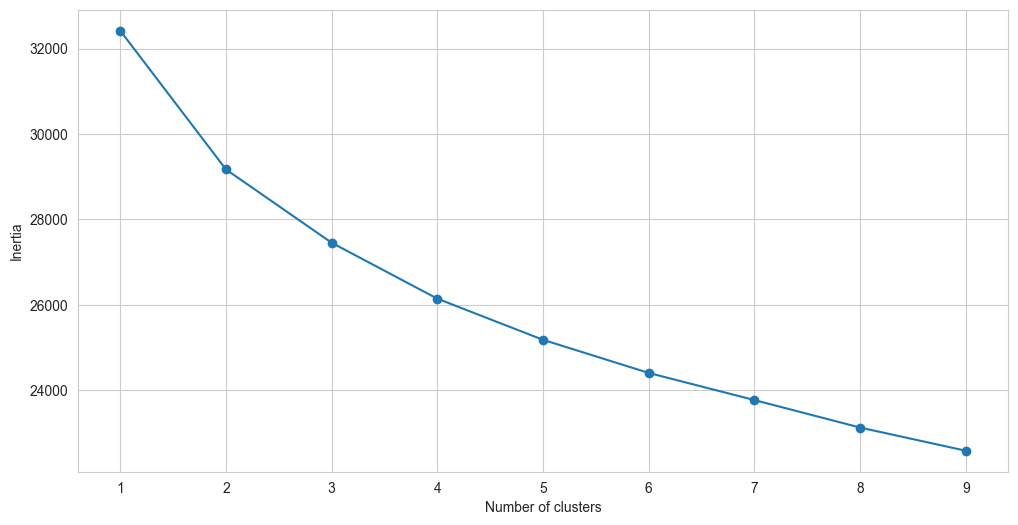

In [5]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [6]:
# k means using 2 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 2, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    1984
0    1258
Name: cluster, dtype: int64

In [7]:
# utility function to scatter plot labelled data using 2 features
def plot_labelled_scatter(X, y, first, second, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X.iloc[:, first].min() - 1, X.iloc[:, first].max() + 1
    y_min, y_max = X.iloc[:, second].min() - 1, X.iloc[:, second].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.xlabel(X.columns[first])
    plt.ylabel(X.columns[second])
    plt.legend(handles=h)
    plt.show()

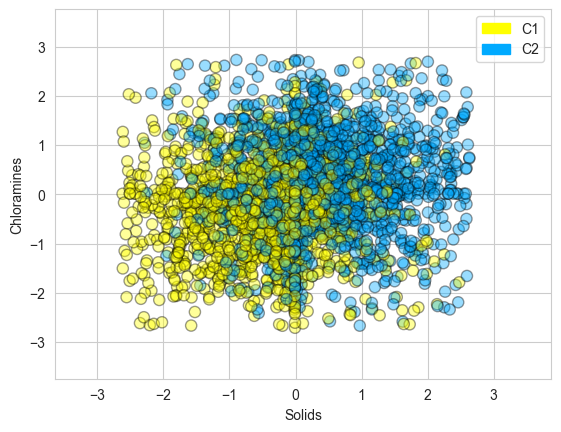

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_scaled[data_cols])

# using solids and chloramines as features
plot_labelled_scatter(data_scaled[data_cols], kmeans.labels_, 2, 3,['C1', 'C2'])

#### B. Silhouette evaluation method

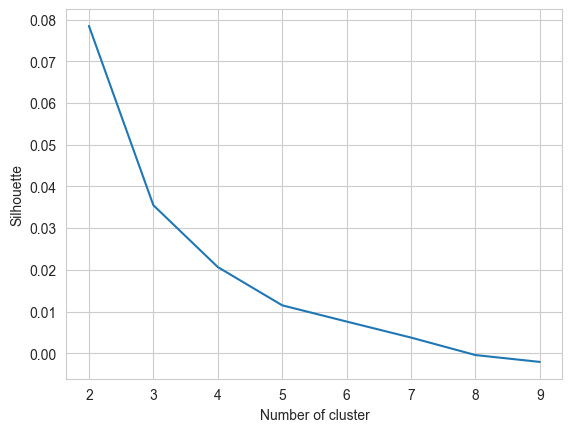

In [9]:
score = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    labels = kmeans.labels_

    score[k] = metrics.silhouette_score(data_scaled[data_cols], labels, metric='euclidean')

plt.figure()
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.08484566030671867
For n_clusters = 3 The average silhouette_score is : 0.07901546212740551
For n_clusters = 4 The average silhouette_score is : 0.075487095442102
For n_clusters = 5 The average silhouette_score is : 0.0742397049137722
For n_clusters = 6 The average silhouette_score is : 0.07616048137140043


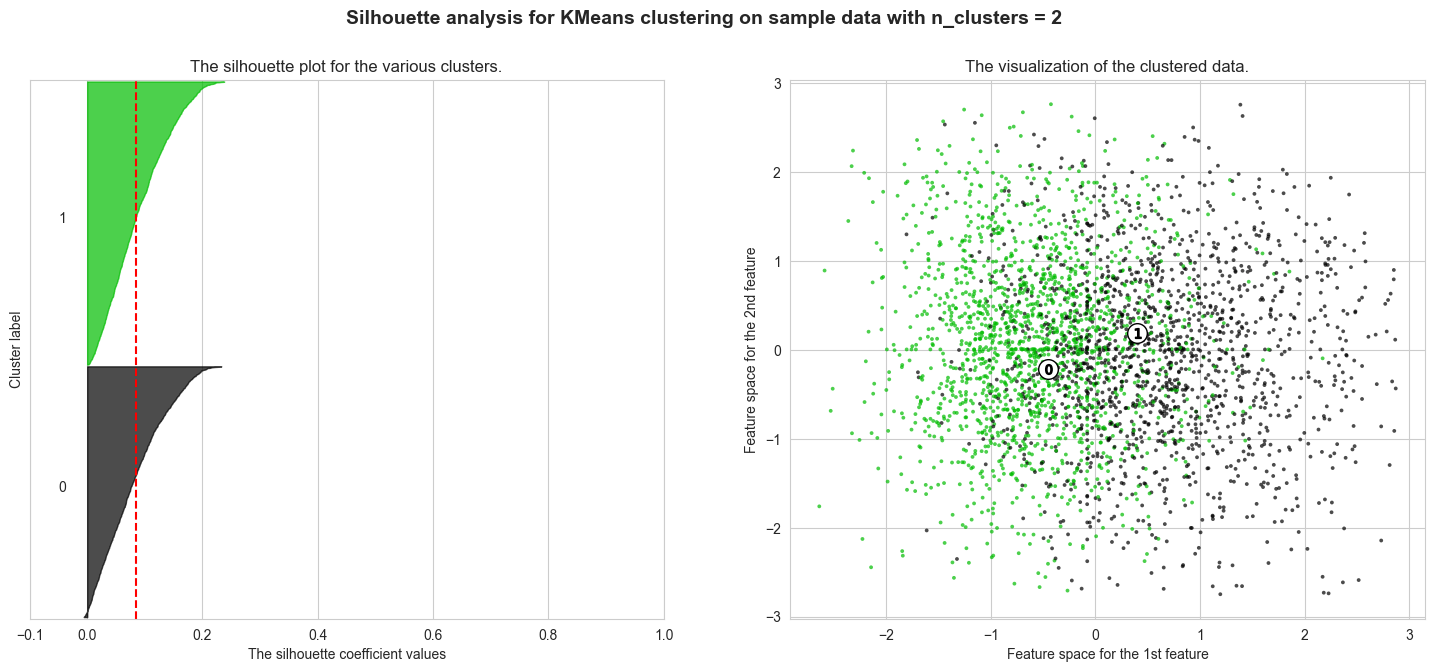

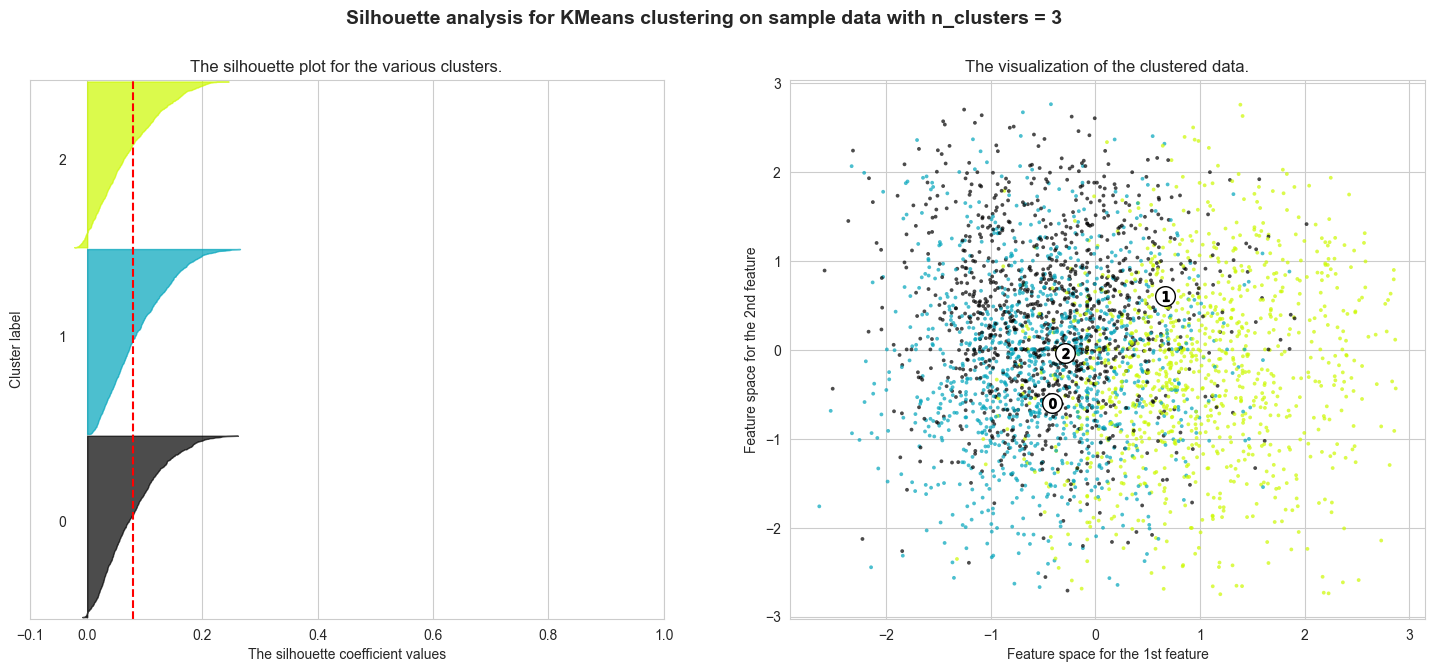

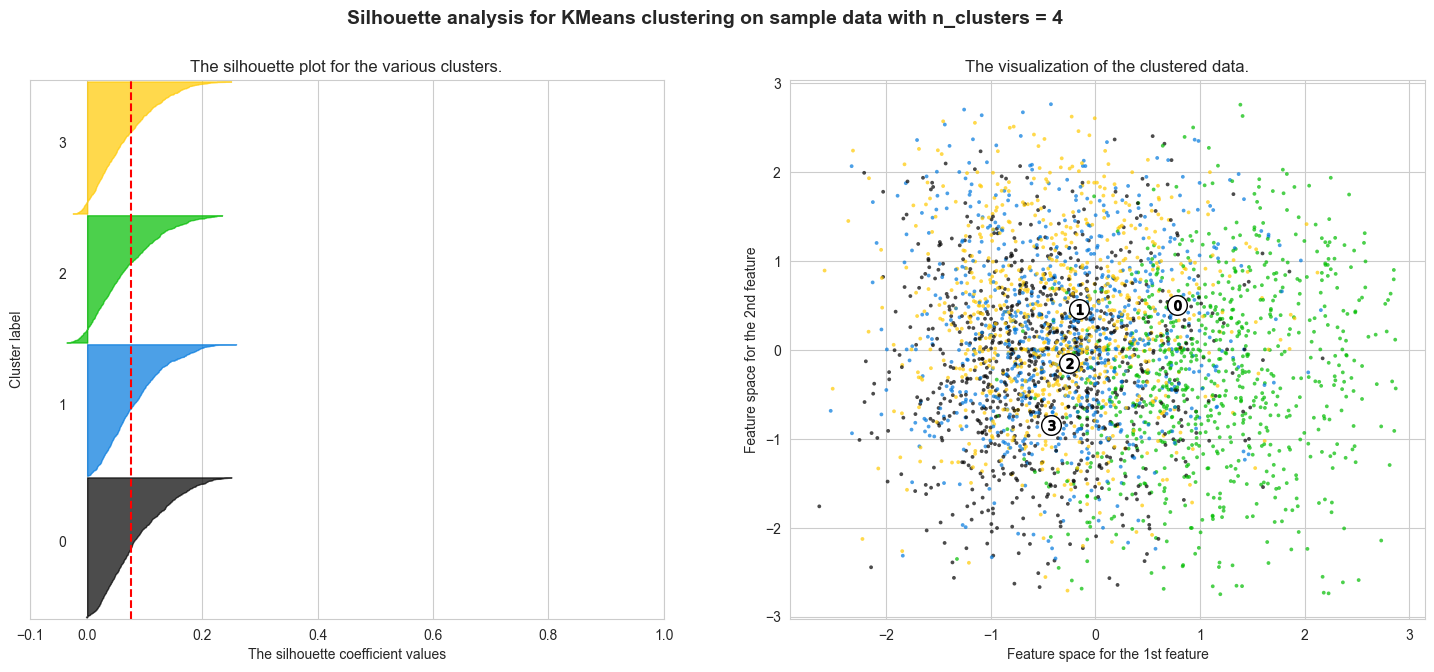

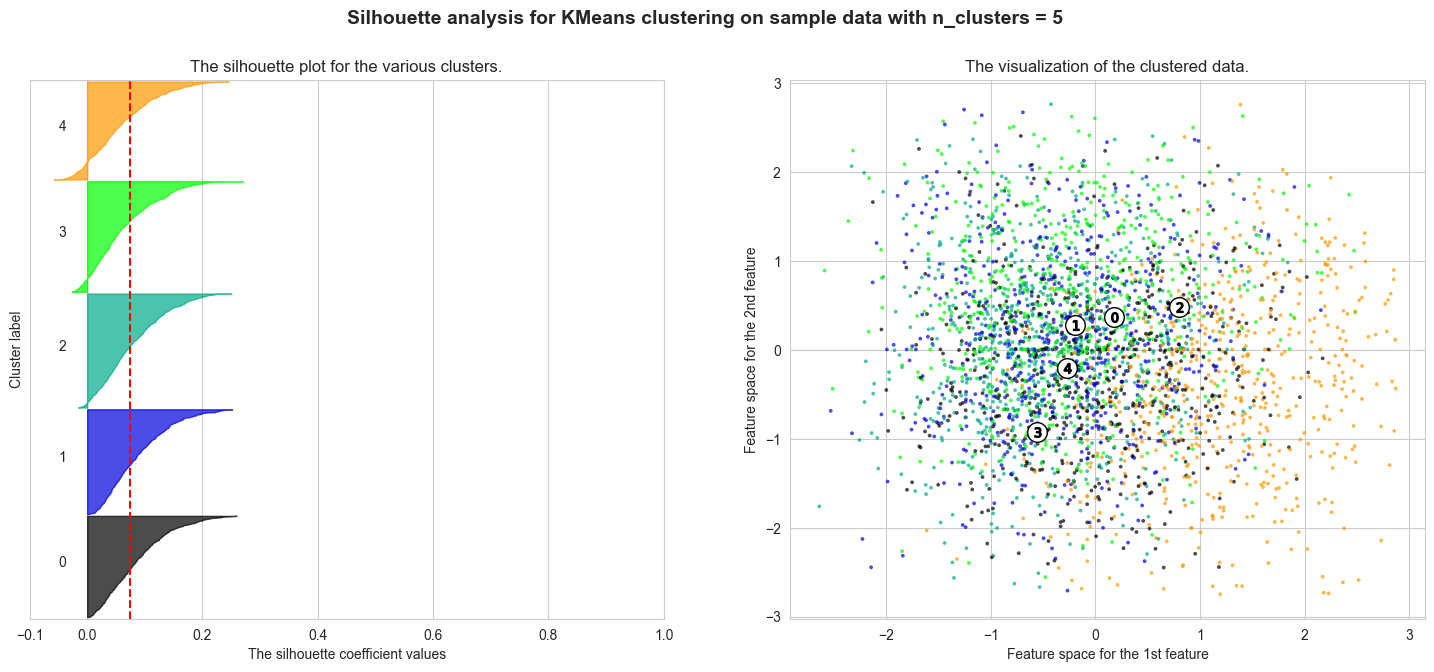

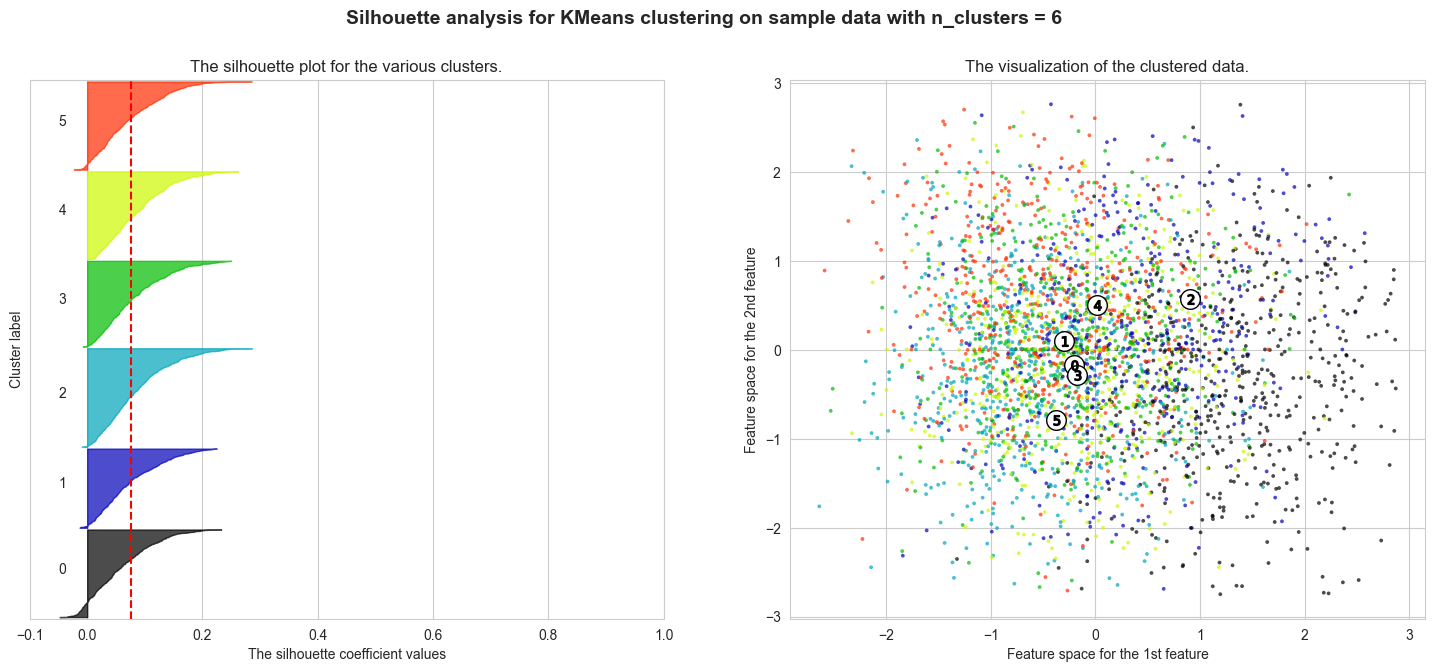

In [10]:
range_n_clusters = [2, 3, 4, 5, 6]
# Using solids and chloramines as features
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled[data_cols]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_scaled[data_cols])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_scaled[data_cols], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled[data_cols], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        # adjust the specific features index here
        data_scaled.iloc[:, 2], data_scaled.iloc[:, 3], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Summary
1. Both performance metrics using K means clustering algorithm indicate that 2 clusters yield the best result.
2. For inertia performance metric, we can use the Elbow method to determine that the sharpest change is at 2 clusters, which identify a cluster of 1984, against another of 1258. These 2 values are closely matched with the known value counts of the classes (1998 and 1278, before dropping outliers, respectively). However, the shape of the curve doesn't really show any distinct sharp, which can benefit the Elbow method, and the SSE is quite high even after 10 iterations. This suggests that it is not a good clustering algorithm for this dataset.
3. For silhouette score metric, it has shown that silhouette score is highest with 2 clusters (0.085). However, this value is just above average, indicating that these 2 clusters are overlapping. Therefore, it reinstates that K means clustering algorithm is not suitable for this dataset.